<a href="https://colab.research.google.com/github/Frankensosege/MachineLearning/blob/main/10MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



pima indian 당뇨병 데이터 가져와 평준화하기



In [33]:
!git clone http://github.com/taehojo/data.git

fatal: destination path 'data' already exists and is not an empty directory.


In [34]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/pima-indians-diabetes3.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
X = df.iloc[:, 0:8]
X.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [37]:
y = df.iloc[:, 8]

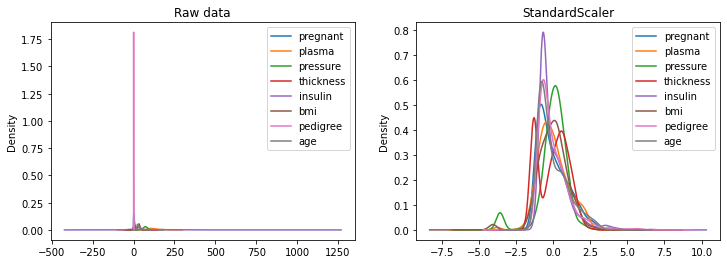

In [38]:
ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
X.plot(kind='kde', title='Raw data', ax=ax[0])
scaled_X.plot(kind='kde', title='StandardScaler', ax=ax[1])
plt.show()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=0)

In [40]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(576, 8) (192, 8) (576,) (192,)


In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

y_pred = lr.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=lr, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

0.2925622759955967
0.32396837377325394
Accuracy: 26.19 %
Standard Deviation: 13.30 %


결정트리 분류

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=dt, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 68.76 %
Standard Deviation: 5.43 %


랜덤포레스트 분류

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.11 %
Standard Deviation: 5.82 %


가우시안 나이브 베이즈</p>
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [44]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=gnb, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.97 %
Standard Deviation: 5.73 %


K-최근접 이웃 분류

In [45]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

y_pred = kn.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=kn, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.26 %
Standard Deviation: 5.68 %


에이다 부스트</p>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [46]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
ab.fit(x_train, y_train)

y_pred = ab.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=ab, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 71.55 %
Standard Deviation: 6.04 %


이차판별분석</p>
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html

In [47]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

y_pred = qda.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=qda, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.79 %
Standard Deviation: 5.53 %


서포트 벡터 머신</p>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [48]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=svc, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 76.23 %
Standard Deviation: 4.44 %


서포트 벡터 머신(RBF)

In [49]:
from sklearn.svm import SVC


svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=svc, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.00 %
Standard Deviation: 3.81 %


보팅</p>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [54]:
from sklearn.ensemble import VotingClassifier

cf1= AdaBoostClassifier()
cf2 = RandomForestClassifier()
cf3 = SVC(kernel='linear')
vc = VotingClassifier(estimators=[('lr', cf1), ('rf', cf2), ('gnb', cf3)])
vc.fit(x_train, y_train)

y_pred = vc.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=vc, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 76.22 %
Standard Deviation: 4.86 %


배깅</p>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [53]:
from sklearn.ensemble import BaggingClassifier


svc = SVC(kernel='rbf')
bc = BaggingClassifier(estimator=svc, n_estimators=10)
bc.fit(x_train, y_train)

y_pred = bc.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=bc, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.89 %
Standard Deviation: 4.89 %


여러 알고리즘 성능 비교

Mean accuracy of D_tree :67.91 %
Mean accuracy of RF :72.75 %
Mean accuracy of GNB :75.20 %
Mean accuracy of KNN :71.54 %
Mean accuracy of Ada :74.48 %
Mean accuracy of QDA :76.04 %
Mean accuracy of SVM_l :72.57 %
Mean accuracy of SVM_k :74.49 %
Mean accuracy of Bagging :74.84 %


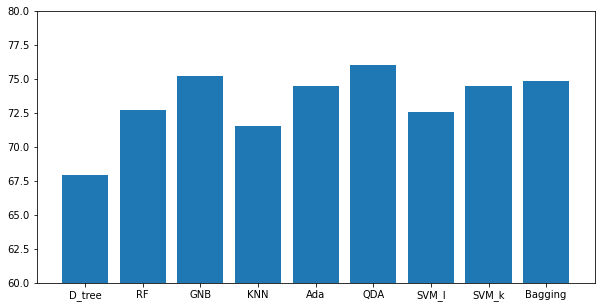

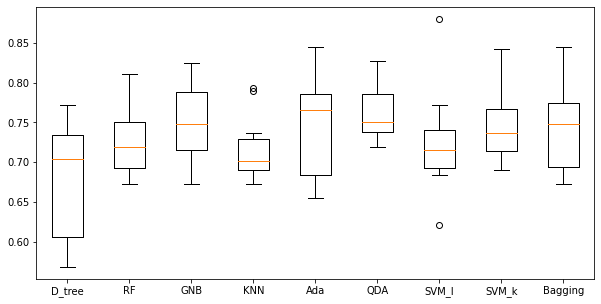

In [55]:
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel='linear'),
               SVC(kernel='rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                            ('2', RandomForestClassifier()),
                                            ('3', SVC(kernel='linear'))]),
               BaggingClassifier(estimator=cf3, n_estimators=10, random_state=0)]
classifier_names = ['D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_l',
                    'SVM_k',
                    'Bagging']
modelaccuraies=[]
modelmeans=[]
modelnames=[]

classifier_data = zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
  skf = StratifiedKFold(n_splits=10, shuffle=True)
  accuracies = cross_val_score(classifier, X=x_train, y=y_train, cv=skf)
  print("Mean accuracy of", classifier_name, ":{:.2f} %".format(accuracies.mean()*100))
  modelaccuraies.append(accuracies)
  modelmeans.append(accuracies.mean()*100)
  modelnames.append(classifier_name)

plt.figure(figsize=(10,5))
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuraies)
ax.set_xticklabels(modelnames)
plt.show()